In [1]:
%matplotlib notebook
from IPython.display import display
from IPython.html import widgets
from scripts.summary_plot import *
from scripts.average_plot import *

C:\Program Files\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# file_directory = "C:\Users\hanr\GitHub\SGM-Beamline\data\spectra_example.dat"
# print file_directory
file_directory = get_abs_path("data/spectra_example.dat")
print file_directory

C:\Users\hanr\GitHub\SGM-Beamline\data/spectra_example.dat


In [3]:
scanNumArray = getAllScanNum(file_directory)
print scanNumArray

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [4]:
inputText = widgets.Text() 
def generateArray(sender):
	print inputText.value
inputText.on_submit(generateArray)
inputText

In [5]:
bad_scan = inputText.value
good_scan = generateGoodScanArray(scanNumArray, bad_scan)

These are the original scan numbers:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



## Open the data file

In [6]:
opened_file = openDataFile(file_directory)

## Create bins, assign data points & calculate the average

In [7]:
bins = 600
temp_array = prepare_average_plot (good_scan ,opened_file, 690, 750, bins , 50, 80)
mean_energy_array = temp_array[0]
avg_mca = temp_array[1]
avg_scaler = temp_array[2]
pfy_data = temp_array[3]
print len(pfy_data[0])

Total scan:  10
Opened all scans.
Start creating bins
Number of Bins: 600
Number of Edges: 601
Energy range is:  690 - 750
created bins completed.

The width of a bin is: 0.1
Start assigning data points into bins
Assign data points completed

Start calcualting Average of MCA1, MCA2, MCA3 & MCA4...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Getting PFY ROIs
600


## Plot Average of MCAs, I0, TEY & Diode

Plotting XAS.


<IPython.core.display.Javascript object>


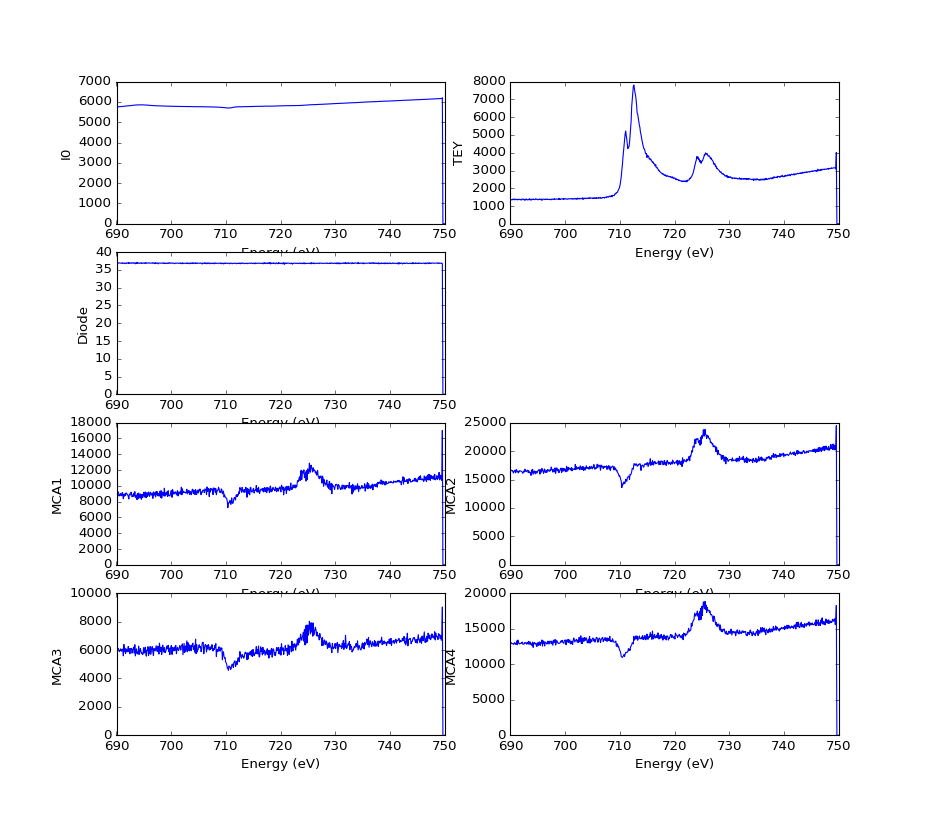

In [8]:
plotAvgXAS_all(mean_energy_array, avg_scaler, pfy_data)

<IPython.core.display.Javascript object>


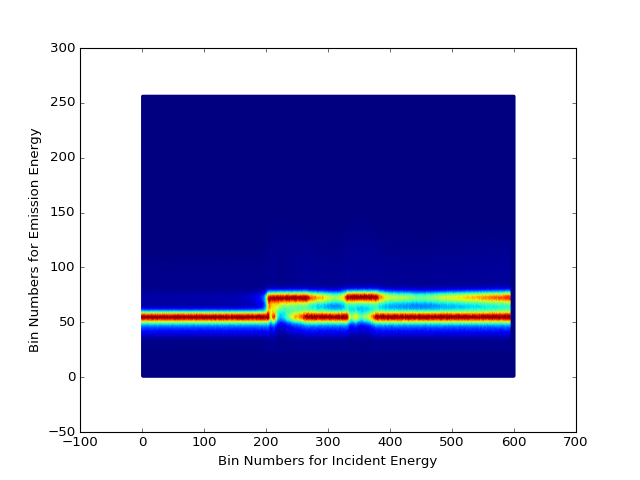

In [9]:
#plot avg of Mac 2 in color scatter plot
plotAvgOfMAC(bins, avg_mca[1])

## Plot Average of TEY

<IPython.core.display.Javascript object>


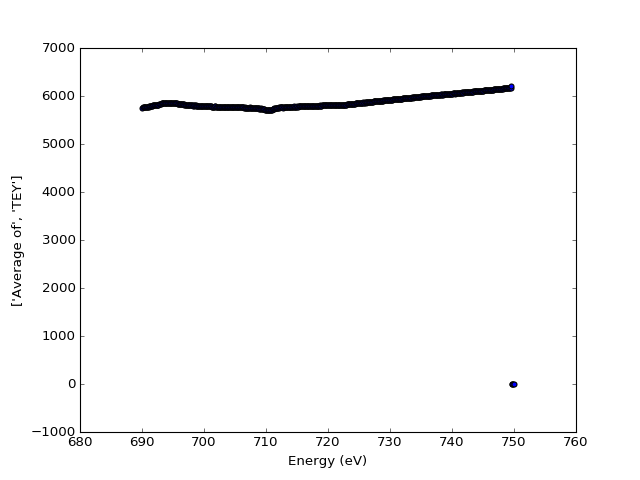

In [10]:
plot_one_avg_scaler(mean_energy_array, avg_scaler[1], "TEY")